# Python notebook to reproduce _Supplementary Figure 10_

In [1]:
import json
import os
import matplotlib.pyplot as plt

import plot_settings
import plot_utils

In [2]:
fig_dir = 'supplementary/figure_10/'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

# Code to reproduce Supplementary Figure 10a,b

Supplementary Fig. 10a

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


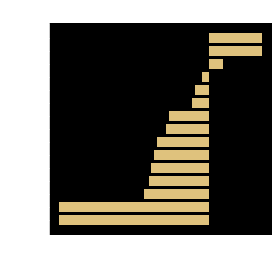

In [3]:
%matplotlib inline

with open('results/TCGA/normalized_mutation_correlation/GLI2_correlation.txt', 'r') as f:
    ct_corrs = json.load(f)
    
ax = plot_settings.get_square_axis()

cts_to_show = [ct for ct in ct_corrs.keys() if ct_corrs[ct] == ct_corrs[ct]]
cts_to_show = sorted(cts_to_show, key=lambda ct: ct_corrs[ct])

plot_utils.horizontal_bar_plot(
    ax, [ct_corrs[ct] for ct in cts_to_show], cts_to_show, 
    'Spearman correlation over time', '', xscale='linear', yscale='linear',
    min_val=0, invert_axes=False, color=plot_settings.get_base_color(),
    edge_color=plot_settings.get_model_colors('cvae'))
plot_utils.format_ax(ax)
plt.title('GLI2')
plt.tight_layout()
plt.savefig(fig_dir + 'figure_10a.pdf')

Supplementary Fig. 10b

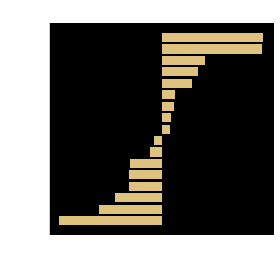

In [4]:
with open('results/TCGA/normalized_mutation_correlation/GLI3_correlation.txt', 'r') as f:
    ct_corrs = json.load(f)
    
ax = plot_settings.get_square_axis()

cts_to_show = [ct for ct in ct_corrs.keys() if ct_corrs[ct] == ct_corrs[ct]]
cts_to_show = sorted(cts_to_show, key=lambda ct: ct_corrs[ct])

plot_utils.horizontal_bar_plot(
    ax, [ct_corrs[ct] for ct in cts_to_show], cts_to_show, 
    'Spearman correlation over time', '', xscale='linear', yscale='linear',
    min_val=0, invert_axes=False, color=plot_settings.get_base_color(),
    edge_color=plot_settings.get_model_colors('cvae'))
plot_utils.format_ax(ax)
plt.title('GLI3')
plt.tight_layout()
plt.savefig(fig_dir + 'figure_10b.pdf')